## Data Exploration

This is where we're going to inspect the dataset we've been downloaded.

<p style='color: yellow;'><i>Note: You need to run on the download_data.py at the scripts folder before to use this notebook</i></p>

#### Getting e-commerce data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load data
df = pd.read_excel('data/online_retail.xlsx')

# Basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (541909, 8)

Column Names:
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

First 5 rows:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Quality Assessment

In [2]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Data types
print("\nData Types:")
print(df.dtypes)

# Basic statistics
print("\nBasic Statistics:")
df.describe()

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Data Types:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

Basic Statistics:


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Data Cleaning

In [3]:
# Remove rows with missing CustomerID (can't analyze customers without ID)
df_clean = df.dropna(subset=['CustomerID'])

# Handle missing Description
df_clean['Description'] = df_clean['Description'].fillna('Unknown Product')

# Check results
print(f"Original shape: {df.shape}")
print(f"After cleaning: {df_clean.shape}")

Original shape: (541909, 8)
After cleaning: (406829, 8)


C:\Users\Jericho\AppData\Local\Temp\ipykernel_26848\923848757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Description'] = df_clean['Description'].fillna('Unknown Product')


In [4]:
# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Create additional time features
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()

# Calculate total amount per transaction
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

C:\Users\Jericho\AppData\Local\Temp\ipykernel_26848\2416305646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
C:\Users\Jericho\AppData\Local\Temp\ipykernel_26848\2416305646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['InvoiceDate'].dt.year
C:\Users\Jericho\AppData\Local\Temp\ipykernel_26848\2416305646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [5]:
# Remove negative quantities (returns) for basic analysis
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Remove extreme outliers
Q1 = df_clean['TotalAmount'].quantile(0.25)
Q3 = df_clean['TotalAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['TotalAmount'] >= lower_bound) & 
                   (df_clean['TotalAmount'] <= upper_bound)]

### Data Analysis and Visualizations

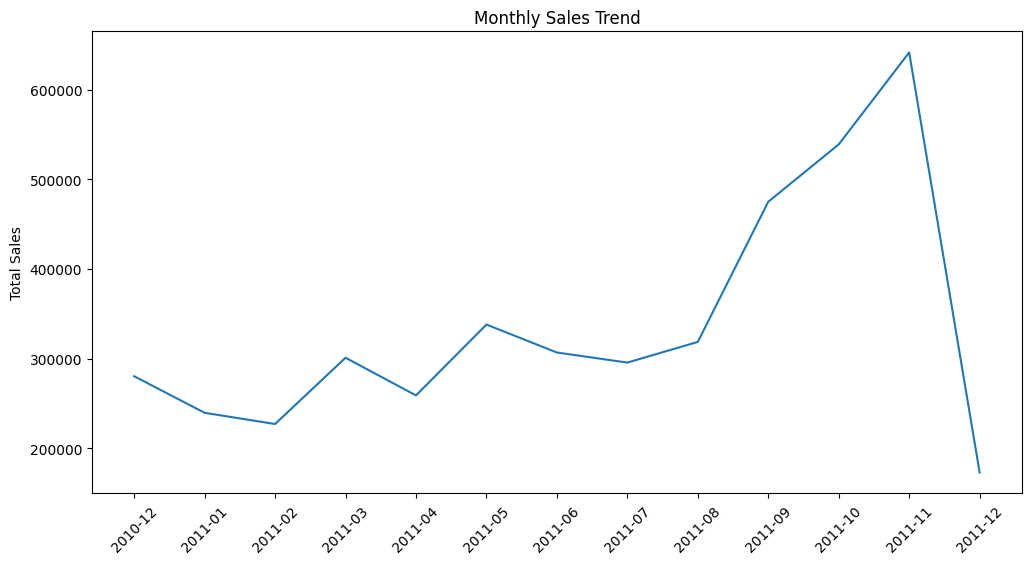

In [6]:
# Monthly sales trend
monthly_sales = df_clean.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['TotalAmount'])
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

In [7]:
# Customer purchase behavior
customer_stats = df_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of orders
    'TotalAmount': ['sum', 'mean'],  # Total and average spending
    'Quantity': 'sum'  # Total items bought
}).round(2)

customer_stats.columns = ['Orders', 'Total_Spent', 'Avg_Order_Value', 'Total_Items']
customer_stats = customer_stats.reset_index()

# Top 10 customers
top_customers = customer_stats.nlargest(10, 'Total_Spent')
print("Top 10 Customers by Total Spending:")
print(top_customers)

Top 10 Customers by Total Spending:
      CustomerID  Orders  Total_Spent  Avg_Order_Value  Total_Items
1825     14911.0     192     89497.40            17.57        58711
1247     14096.0      17     42520.92             8.59        13908
3887     17841.0     124     36302.98             4.65        21959
544      13089.0      81     29380.59            19.75        19500
1390     14298.0      41     28086.59            21.13        40711
322      12748.0     201     24530.62             5.44        19809
540      13081.0      10     16002.28            18.33        14406
1908     15039.0      46     14468.74            10.02         7028
1290     14156.0      39     14052.28            16.36         8795
2107     15311.0      91     13327.98             6.78         8280


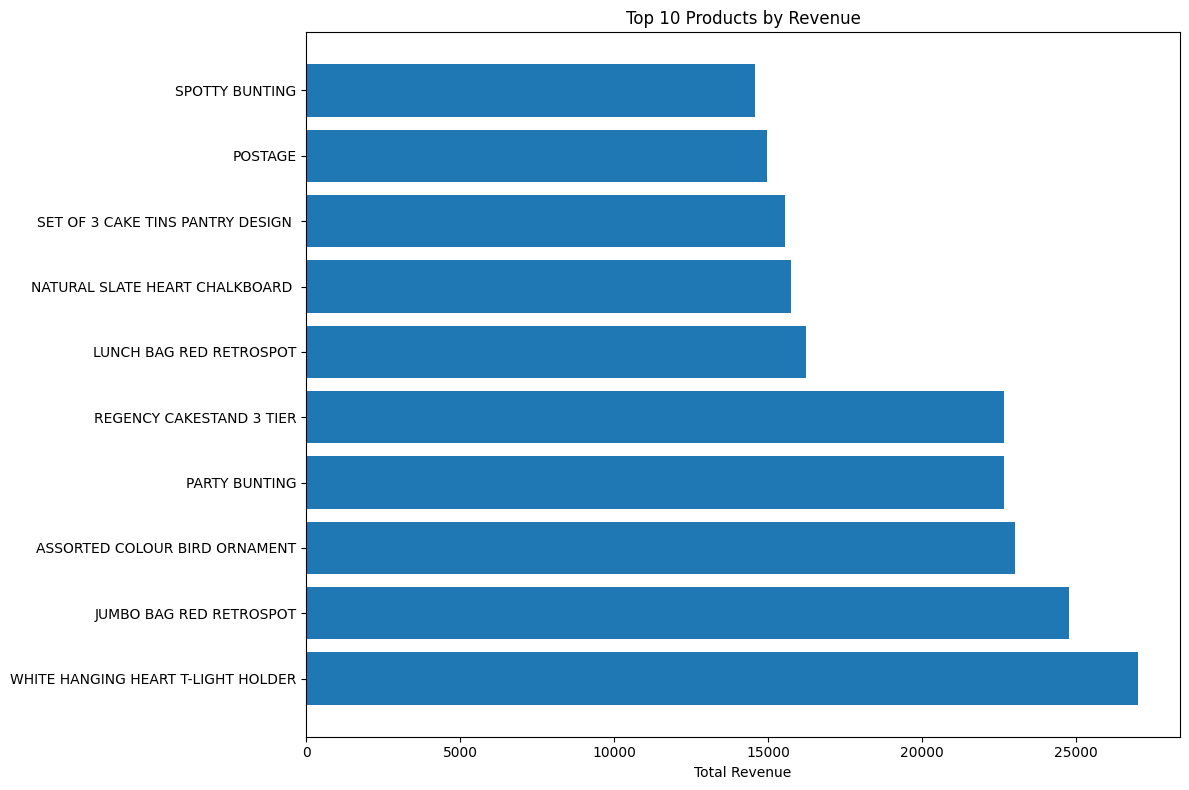

In [8]:
# Top selling products
product_sales = df_clean.groupby('Description').agg({
    'Quantity': 'sum',
    'TotalAmount': 'sum'
}).sort_values('TotalAmount', ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(product_sales.index, product_sales['TotalAmount'])
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

### Output

In [ ]:
plt.savefig('visualizations/monthly_sales_trend.png', dpi=300, bbox_inches='tight')